In [1]:
cd(@__DIR__)
include("../AR/utils/utils.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")

Plot_Pheno_Dates (generic function with 1 method)

## Apple phenology model

Dormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

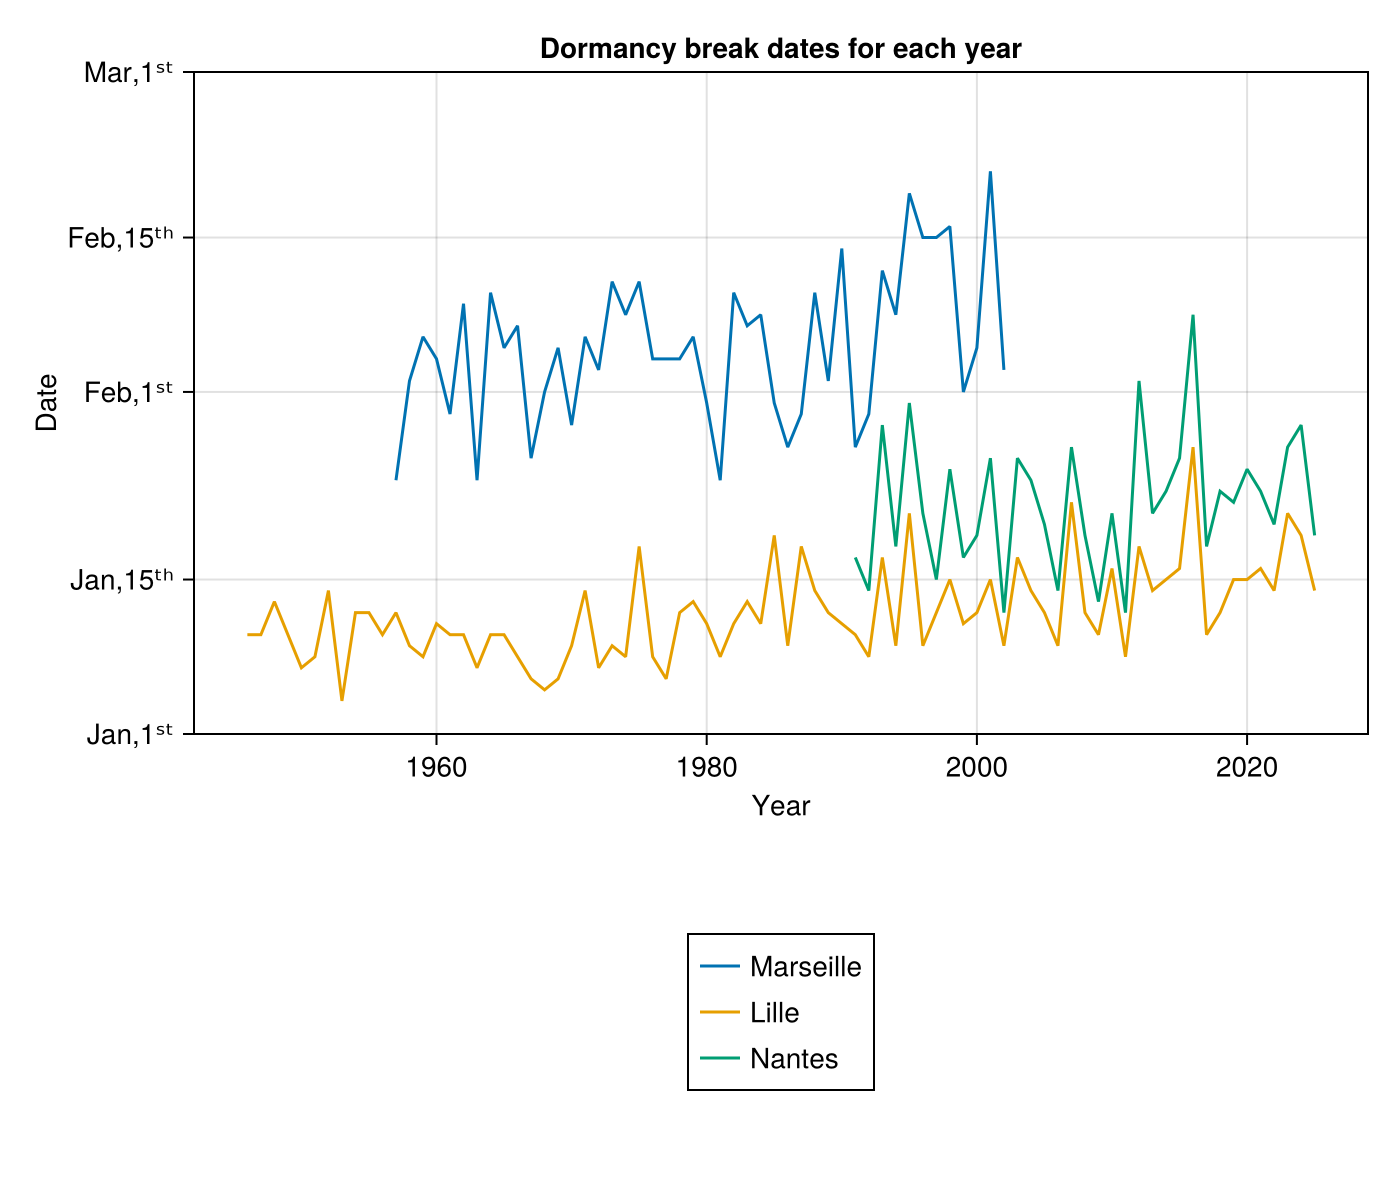

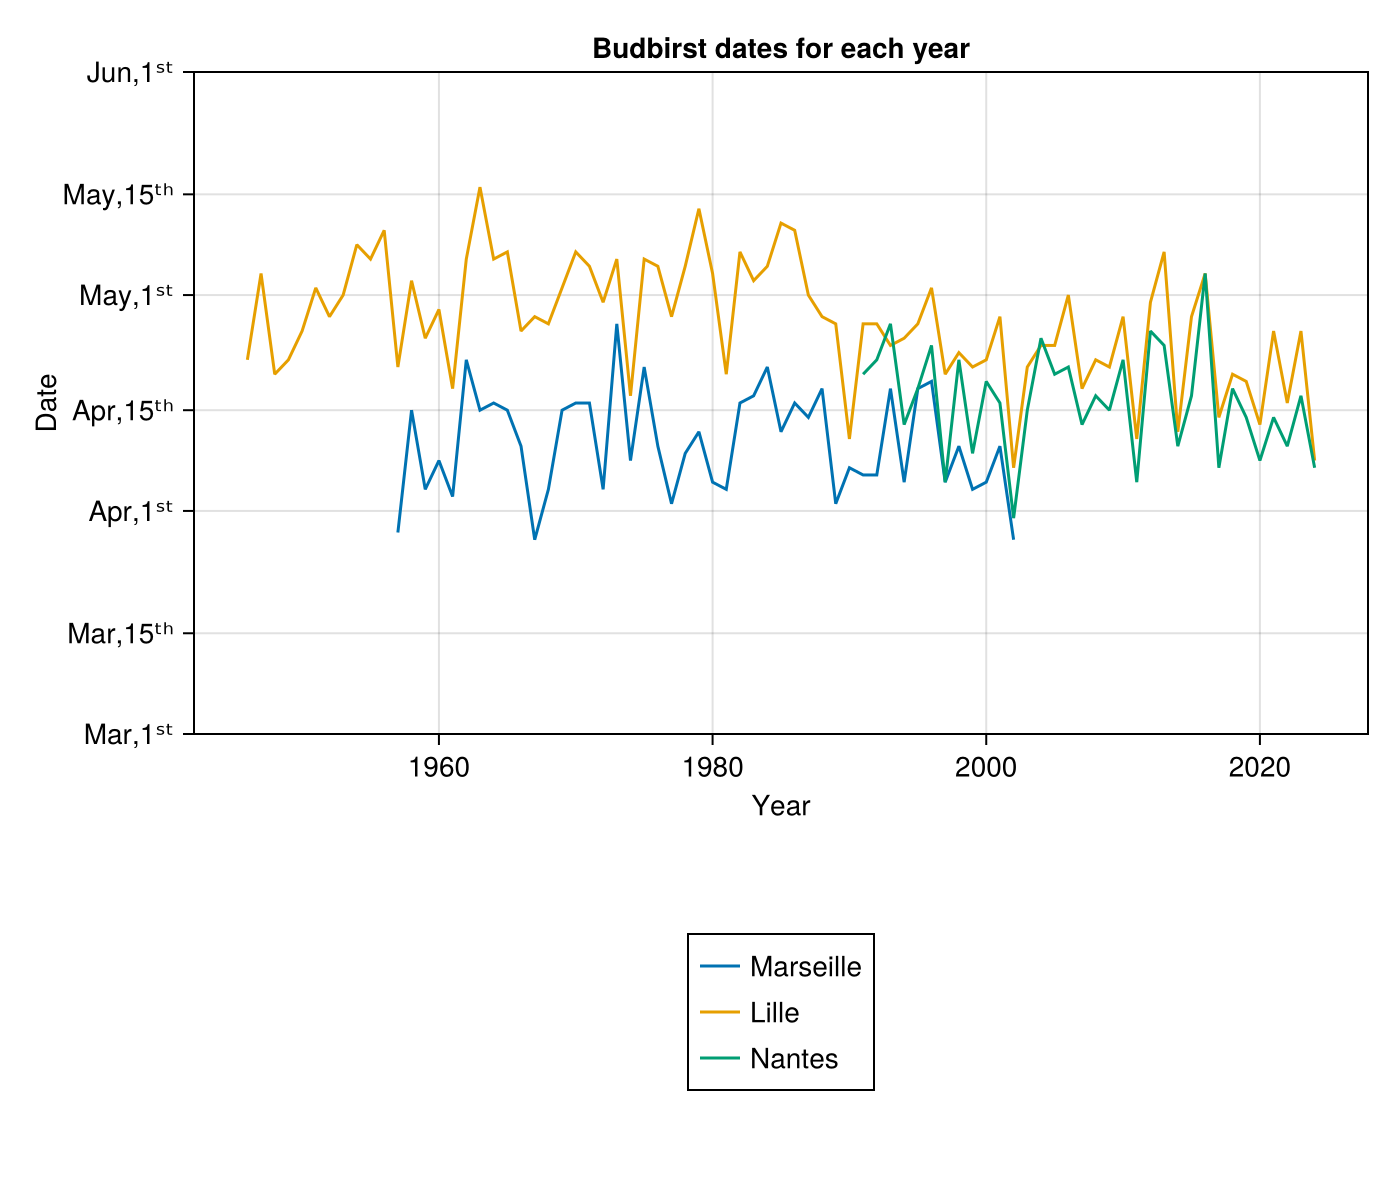

CairoMakie.Screen{IMAGE}


In [2]:
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(initTG("TG_STAID000031.txt"))
DB_Lille, BB_Lille = Apple_Phenology_Pred(initTG("TG_STAID000737.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG("TG_STAID000742.txt"))
display(Plot_Pheno_Dates([DB_Marseille, DB_Lille, DB_Nantes], (10, 30), title="Dormancy break", labelvec=["Marseille", "Lille", "Nantes"]))
display(Plot_Pheno_Dates([BB_Marseille, BB_Lille, BB_Nantes], (10, 30), title="Budbirst", labelvec=["Marseille", "Lille", "Nantes"]), BB=true)

## Vine phenology model

Dormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

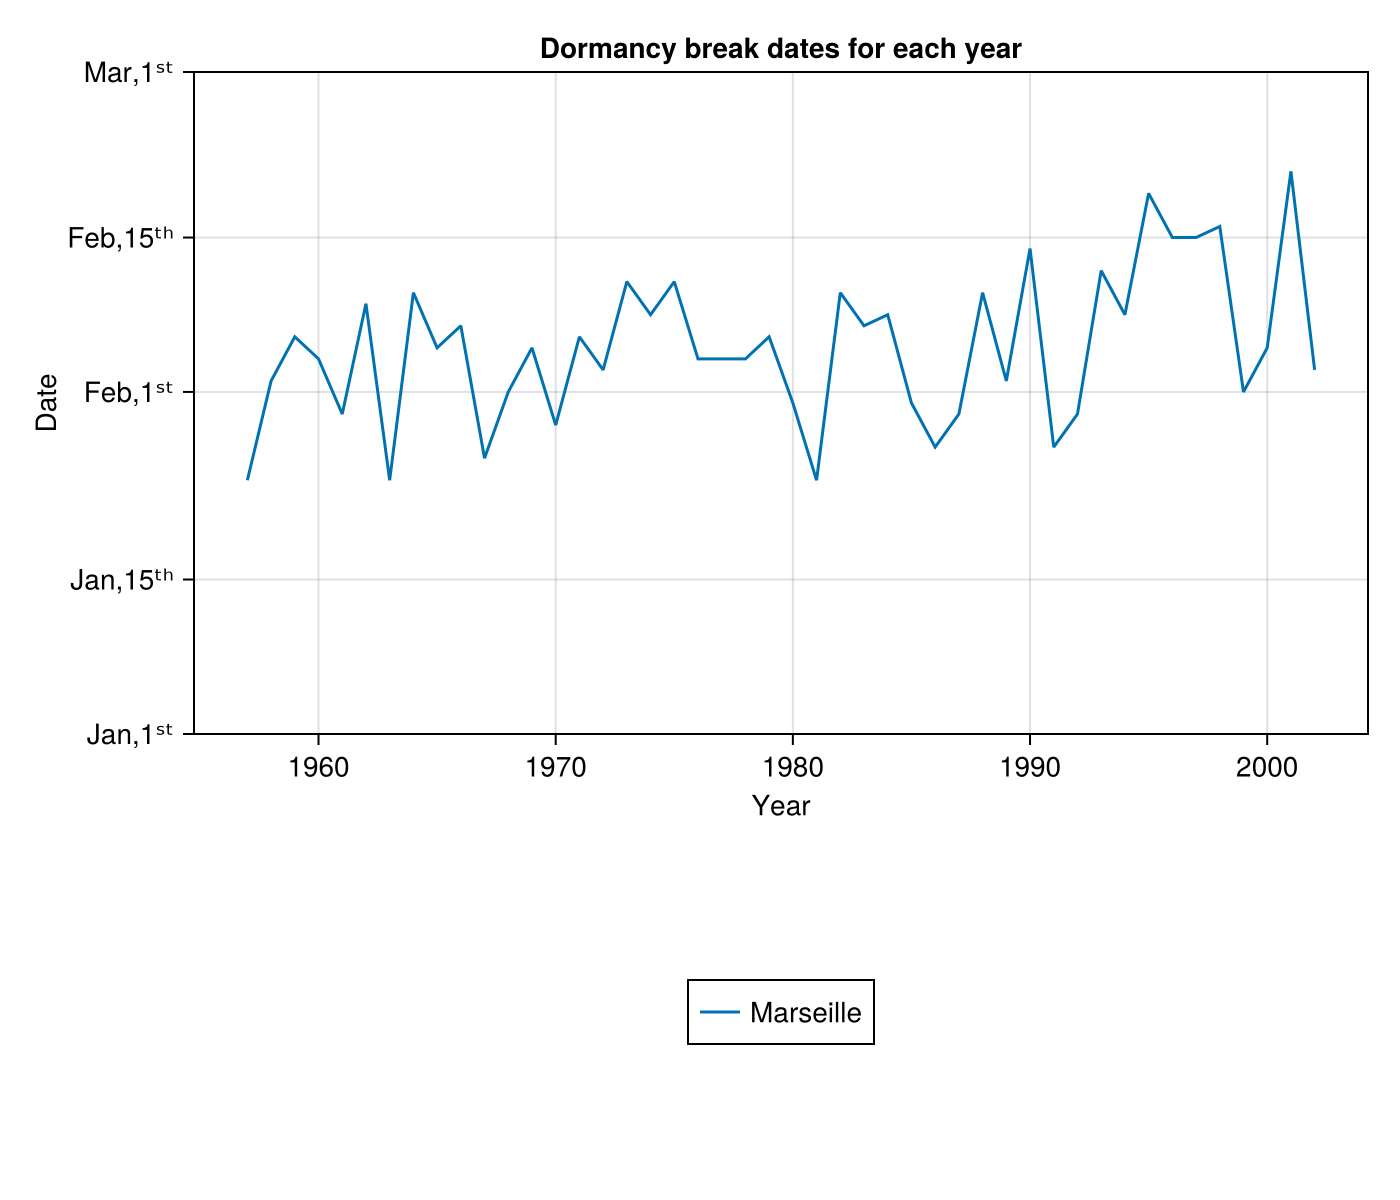

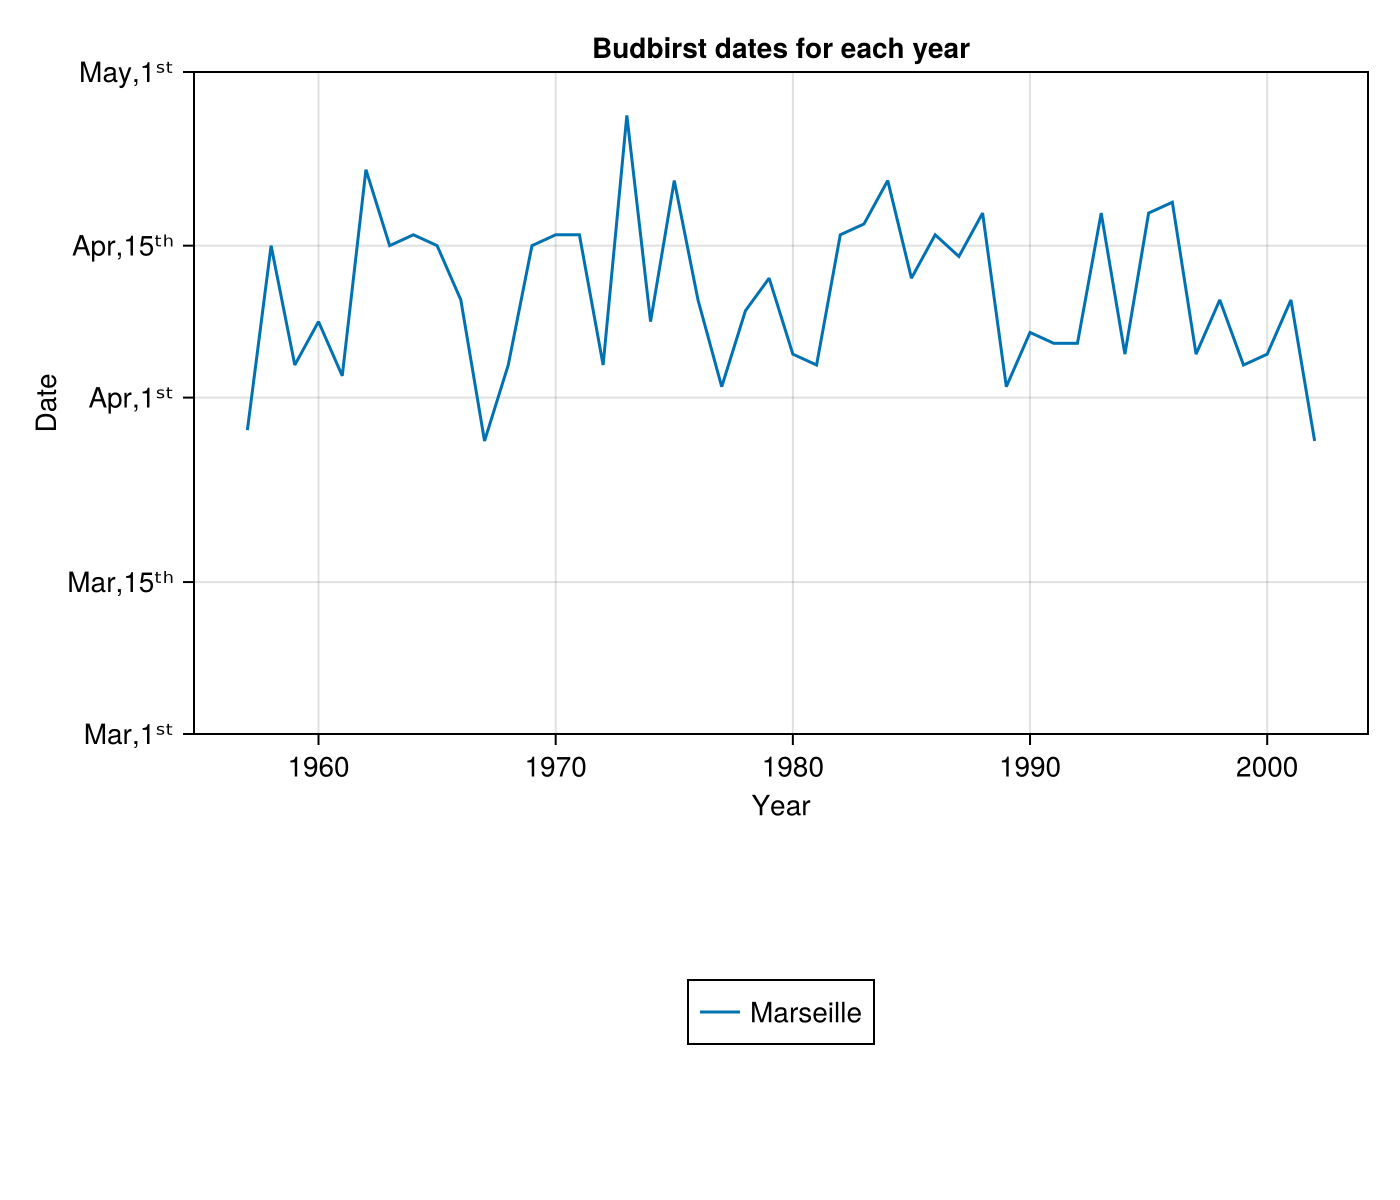

  21.914 ms (139550 allocations: 15.34 MiB)


CairoMakie.Screen{IMAGE}


In [9]:
include("PhenoPred.jl")
using BenchmarkTools

@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Dormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budbirst", labelvec=["Marseille"], BB=true))

Using a VinePhenoModel structure

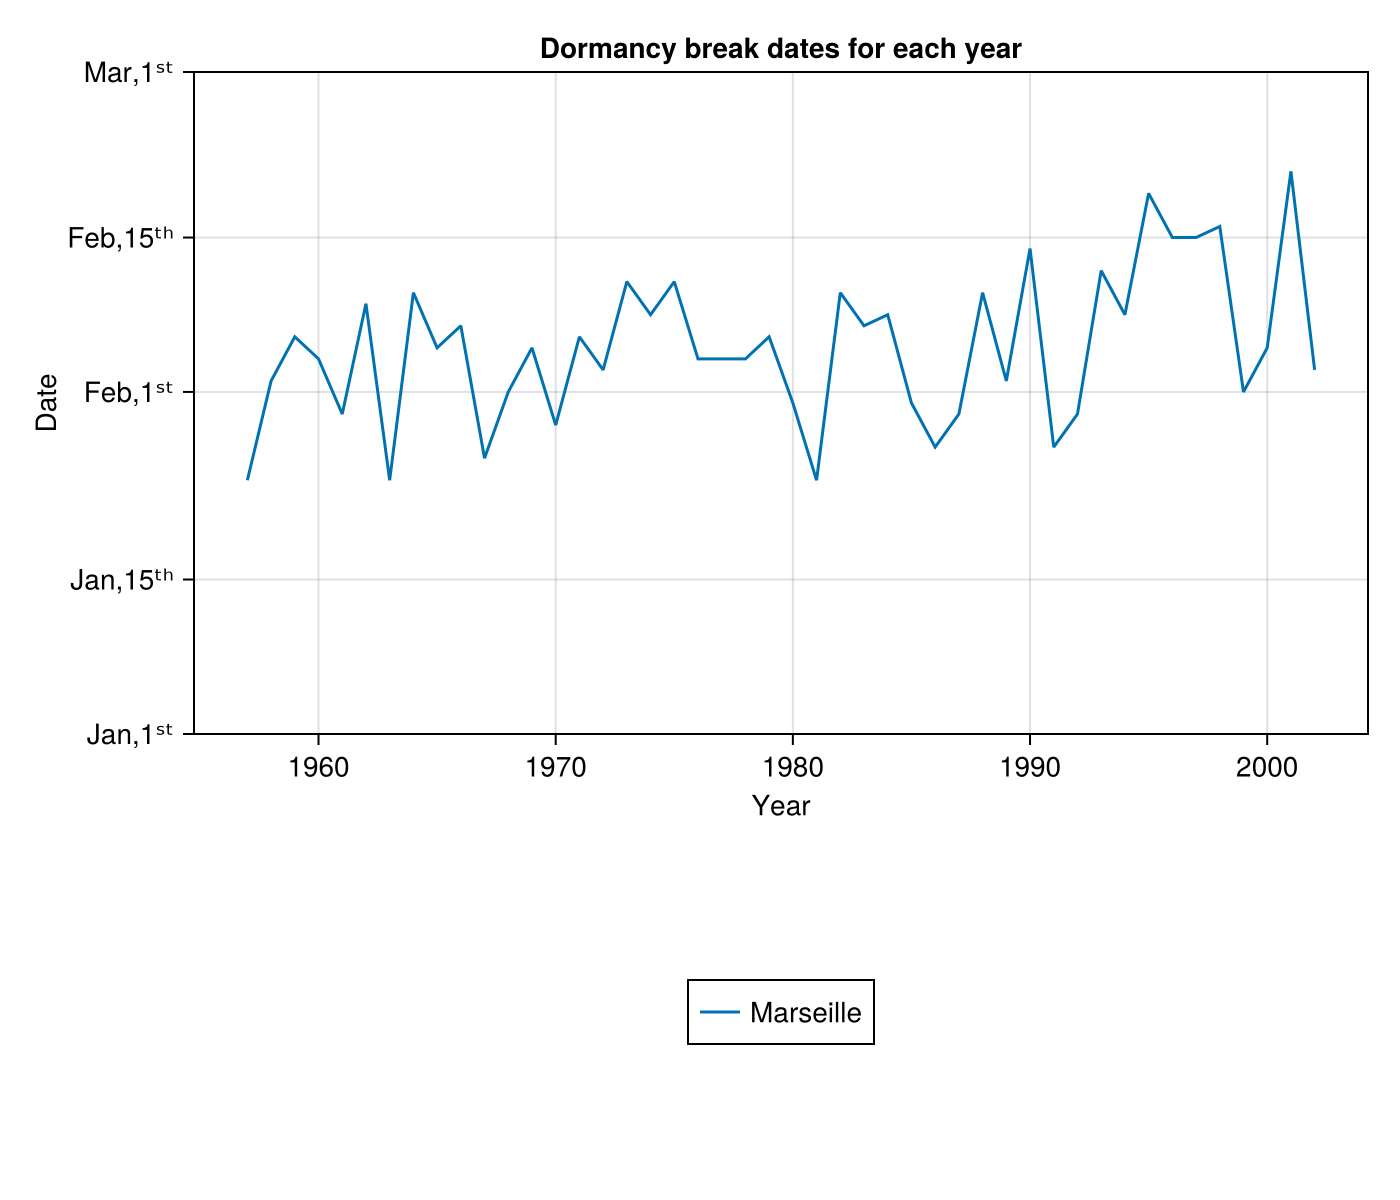

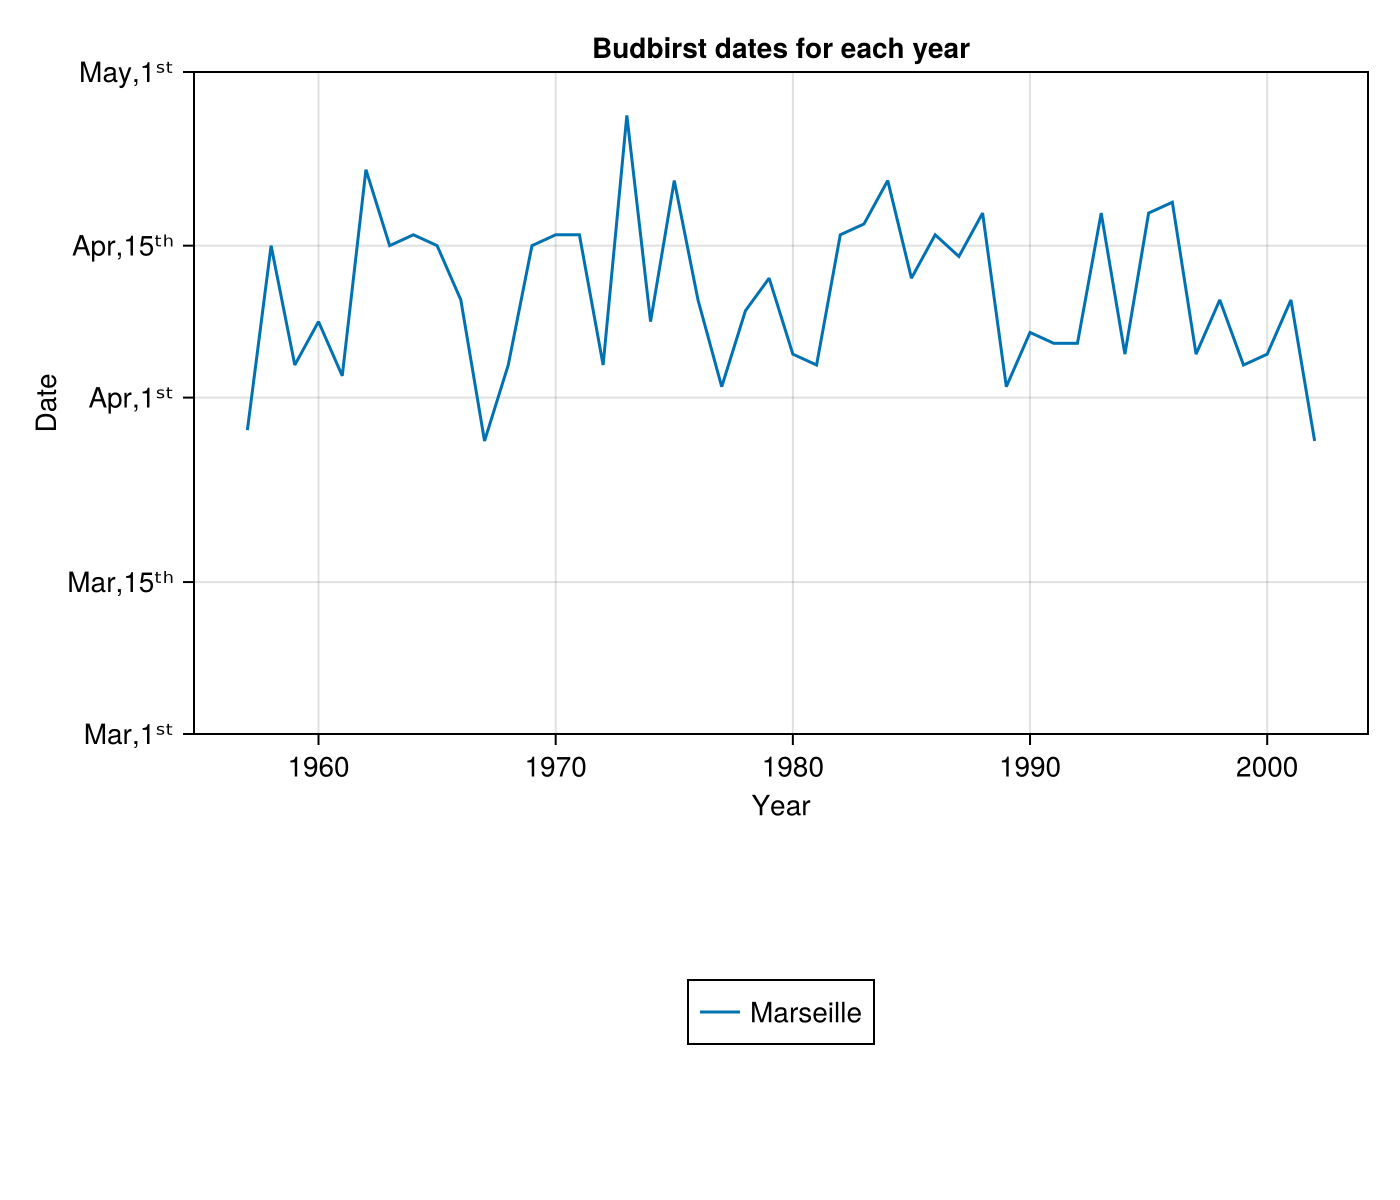

  33.474 ms (745975 allocations: 26.83 MiB)


CairoMakie.Screen{IMAGE}


In [10]:
@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred(InitVinePhenoModel("TN_STAID000031.txt", "TX_STAID000031.txt"))

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Dormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budbirst", labelvec=["Marseille"]), BB=true)

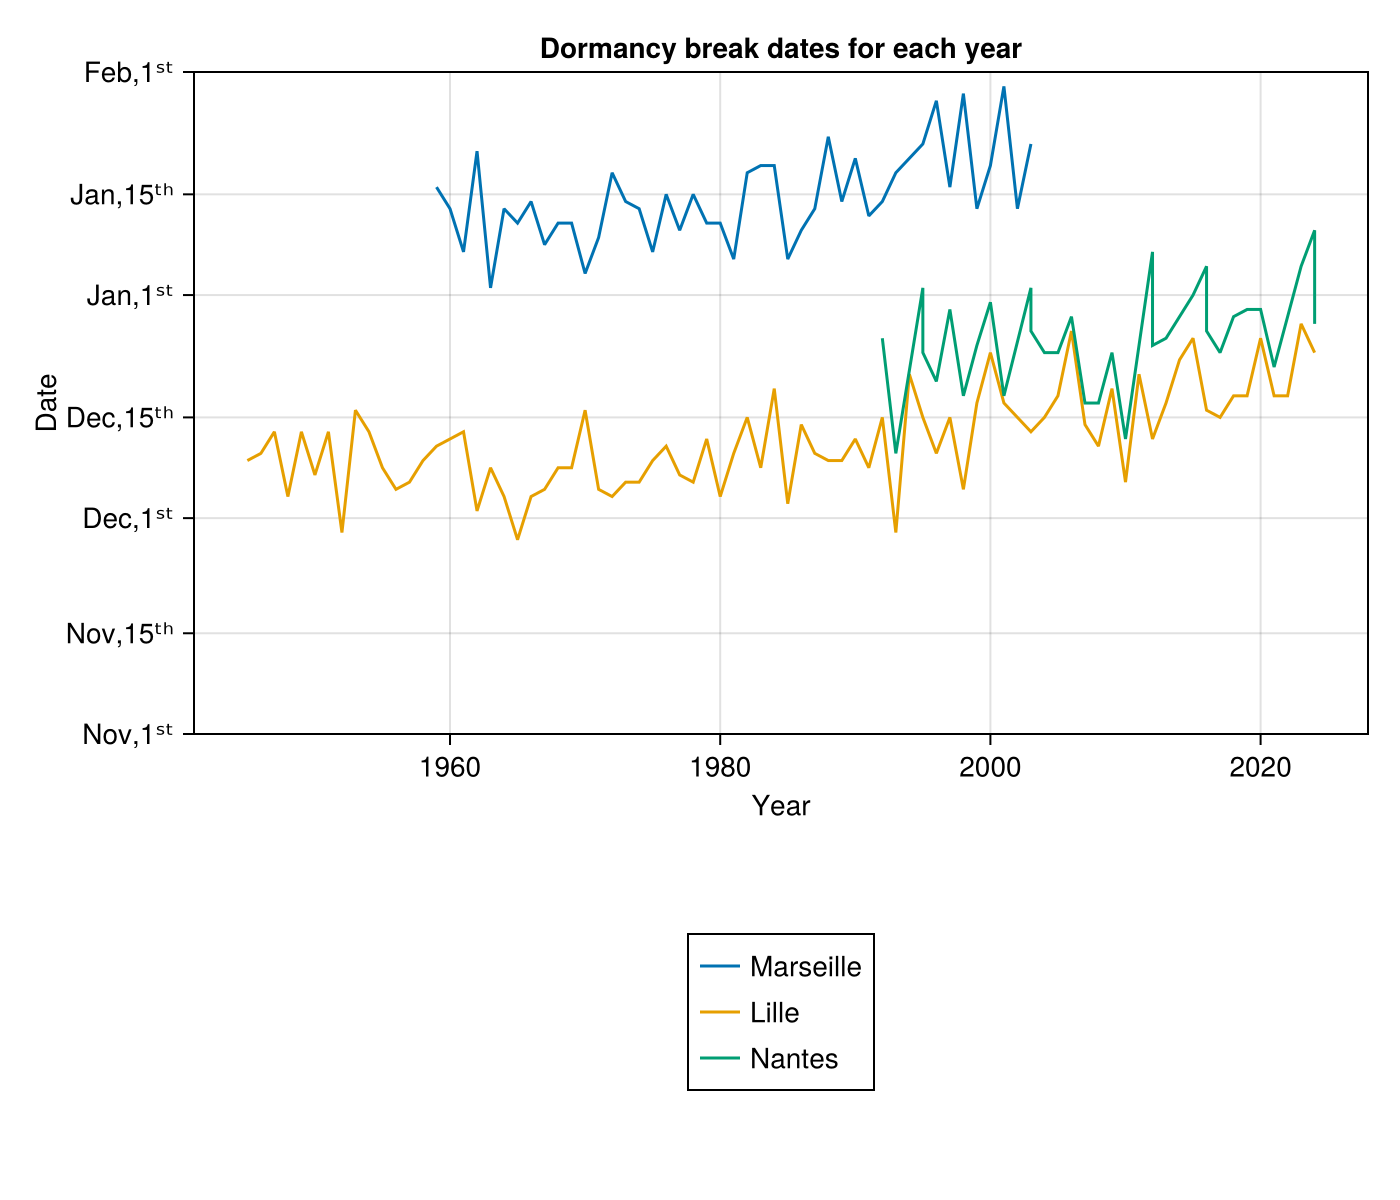

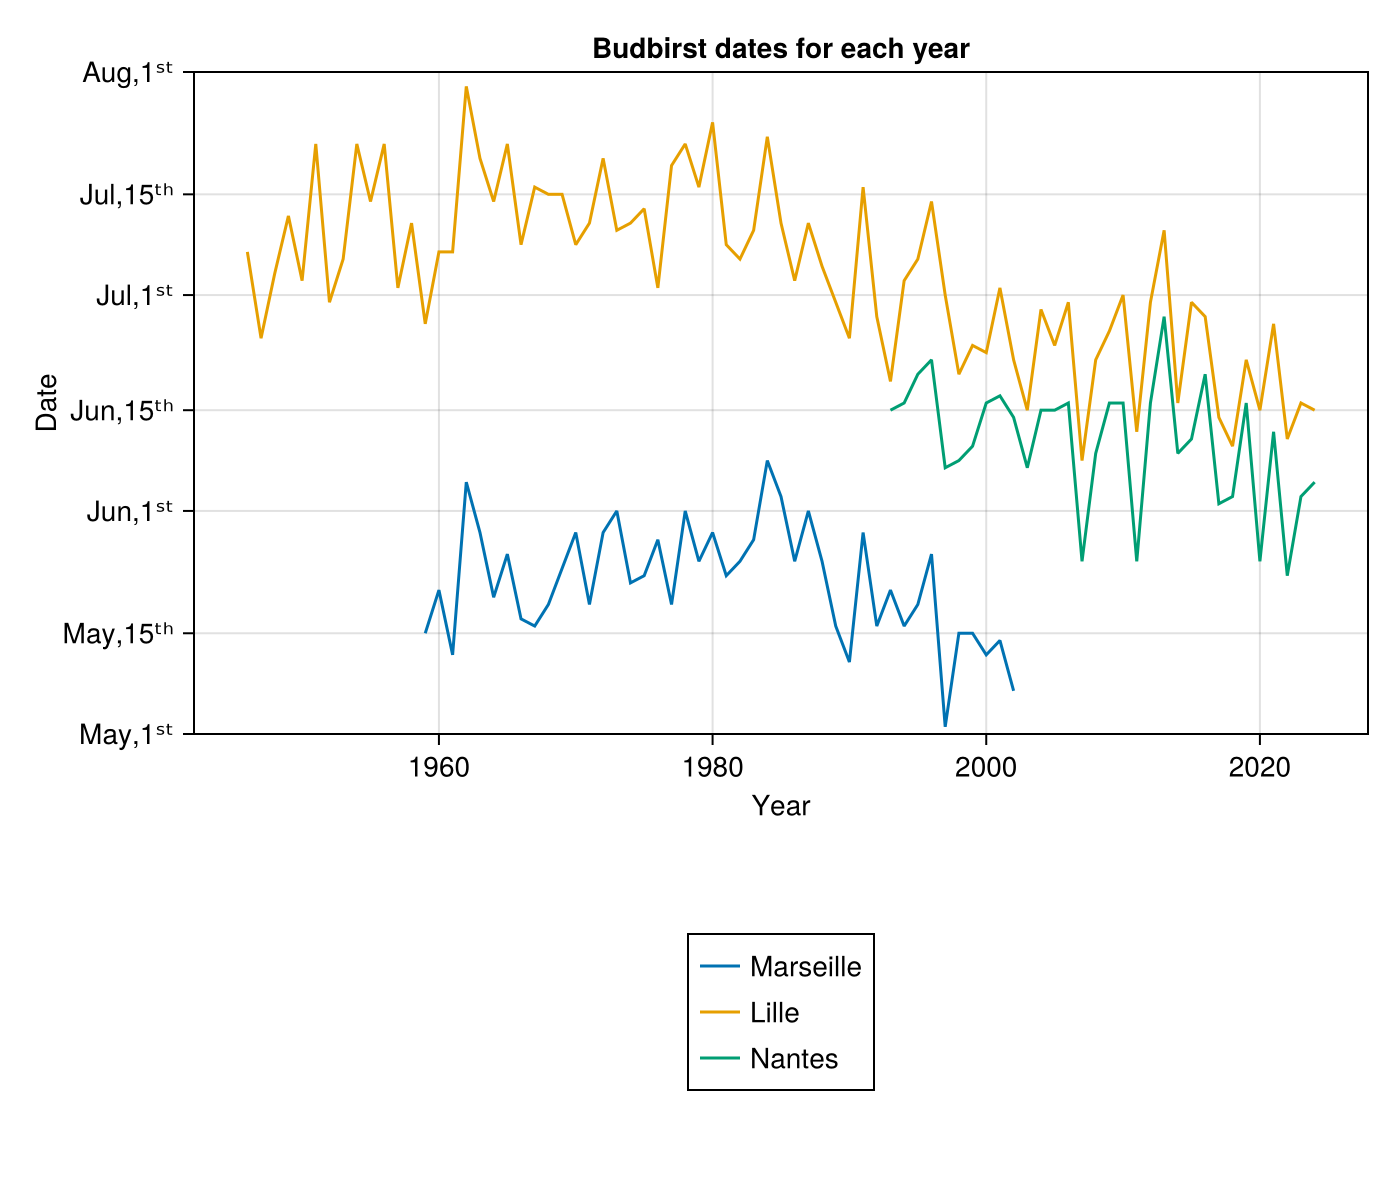

CairoMakie.Screen{IMAGE}


In [11]:
DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")
DB_Lille, BB_Lille = Vine_Phenology_Pred("TN_STAID000737.txt", "TX_STAID000737.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred("TN_STAID000742.txt", "TX_STAID000742.txt")
display(Plot_Pheno_Dates([DB_Marseille, DB_Lille, DB_Nantes], (8, 1), title="Dormancy break", labelvec=["Marseille", "Lille", "Nantes"]))
display(Plot_Pheno_Dates([BB_Marseille, BB_Lille, BB_Nantes], (8, 1), title="Budbirst", labelvec=["Marseille", "Lille", "Nantes"]), BB=true)